<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Linear Algebra

This topic, *Intro to Linear Algebra*, is the first in the *Machine Learning Foundations* series. 

It is essential because linear algebra lies at the heart of most machine learning approaches and is especially predominant in deep learning, the branch of ML at the forefront of today’s artificial intelligence advances. Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces, thereby enabling machines to recognize patterns and make predictions. 

The content covered in *Intro to Linear Algebra* is itself foundational for all the other topics in the Machine Learning Foundations series and it is especially relevant to *Linear Algebra II*.

Over the course of studying this topic, you'll: 

* Understand the fundamentals of linear algebra, a ubiquitous approach for solving for unknowns within high-dimensional spaces. 

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms. 

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Data Structures for Algebra*

* What Linear Algebra Is  
* A Brief History of Algebra 
* Tensors 
* Scalars 
* Vectors and Vector Transposition
* Norms and Unit Vectors
* Basis, Orthogonal, and Orthonormal Vectors
* Arrays in NumPy  
* Matrices 
* Tensors in TensorFlow and PyTorch

*Segment 2: Common Tensor Operations* 

* Tensor Transposition
* Basic Tensor Arithmetic
* Reduction
* The Dot Product
* Solving Linear Systems

*Segment 3: Matrix Properties*

* The Frobenius Norm
* Matrix Multiplication
* Symmetric and Identity Matrices
* Matrix Inversion
* Diagonal Matrices
* Orthogonal Matrices


If it has an exponential term, it isn't linear algebra. E.g., 2x<sup>2</sup> + 5 = 25 or an equation involving square-roots. In Linear Algebra, we use more than one term with systems of linear equations.

## Segment 1: Data Structures for Algebra

**Slides used to begin segment, with focus on introducing what linear algebra is, including hands-on paper and pencil exercises.**

### What Linear Algebra Is

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

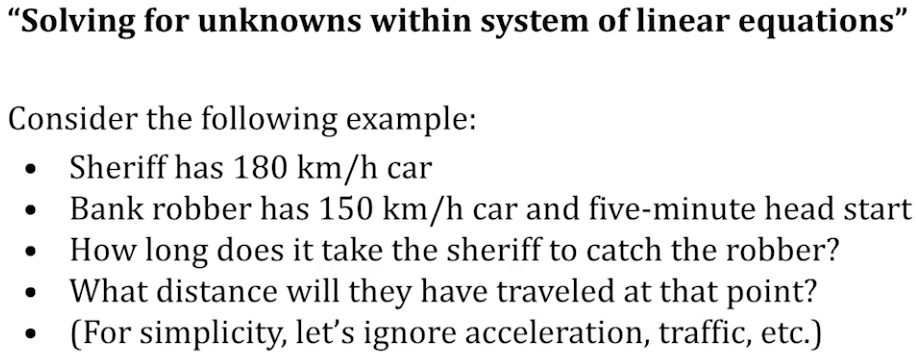

In [2]:
Image('../img/Bank Robber - 1.png')

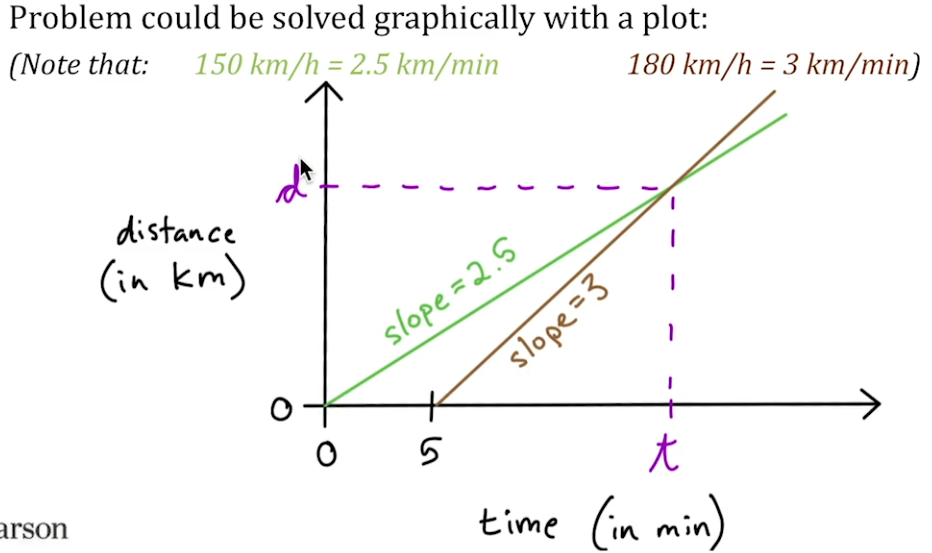

In [7]:
Image('../img/Bank Robber - 2.png')

In [3]:
t = np.linspace(0, 40, 1000) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [4]:
d_r = 2.5 * t 

Distance travelled by sheriff: $d = 3(t-5)$

In [5]:
d_s = 3 * (t-5)

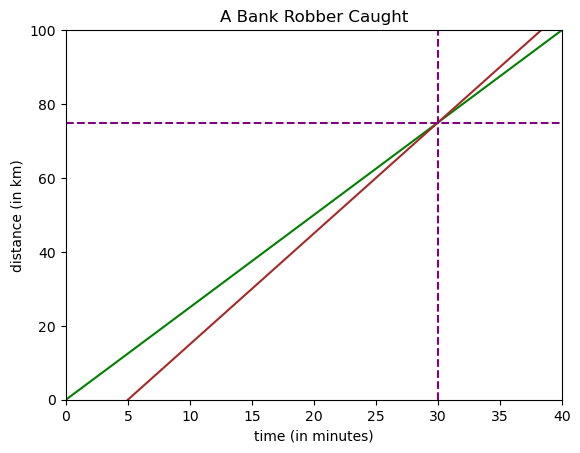

In [6]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

In Linear Algbra, there are no curves, all lines are straight. So, we can either have no solution (parallel lines), one solution (intersecting lines) or infinite solutions (overlapping lines).

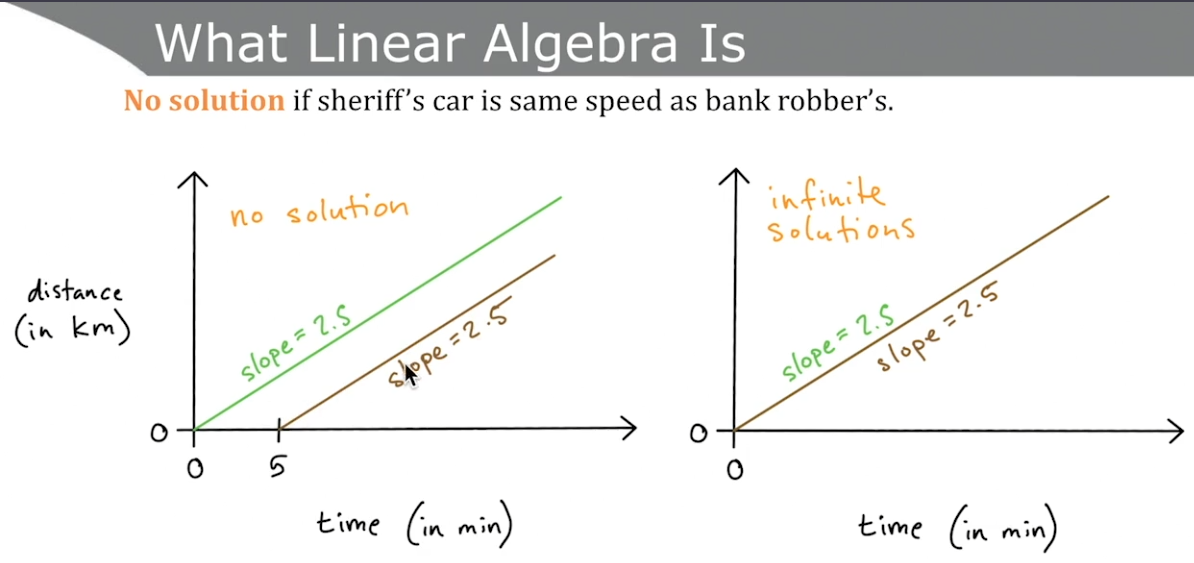

In [3]:
Image('../img/Linear Algebra Solutions.png')

In a given system of equations, we can have many equations and each equation can have many variables. 

<b>Many Unknowns in an equation</b> <br>
In the following example, we have a regression problem where we are trying to predict the house price of a house using several variables, such as the number of bedrooms, the number of bathrooms, and the number of rooms, and distance to school. Each of the variables, from a to m, needs to be learned in order to predict the price of a house.

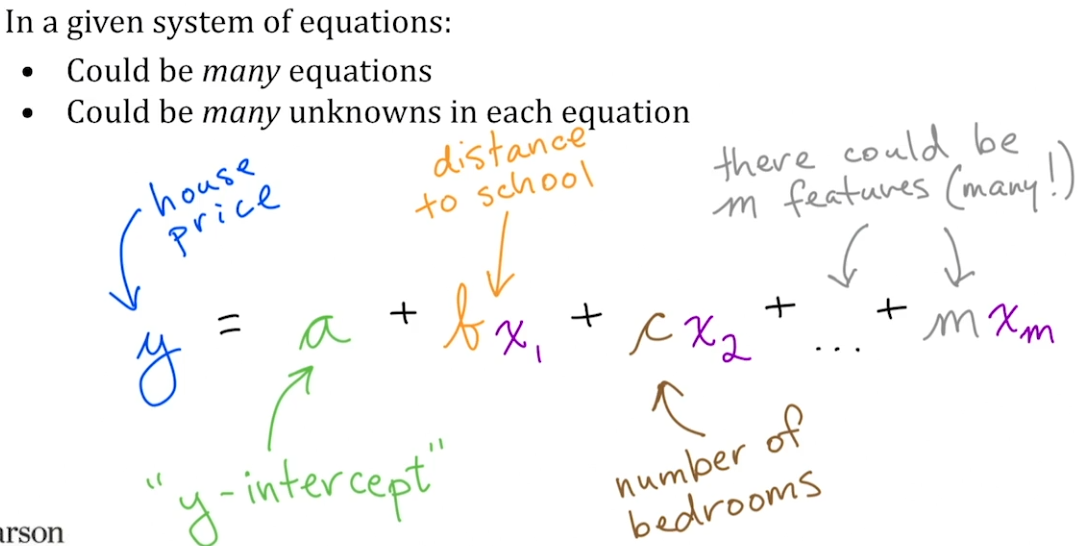

In [2]:
Image("../img/Many Unknowns - Linear Algebra.png")

<b>Many Equations</b> <br>
Using the formula from the previous screenshot, here we see that every singly insance of the house is a different row. So, we have a system of equations to solve the house problem, denoted by the square brackets; the vertical line represents the equal sign, where we have the output vector on the left side and the input matrix on the right side.

y<sub>i</sub> (the price of any house) is determined by the features x<sub>i, 1</sub> to x<sub>i, m</sub> where m is the number of features in the dataset.

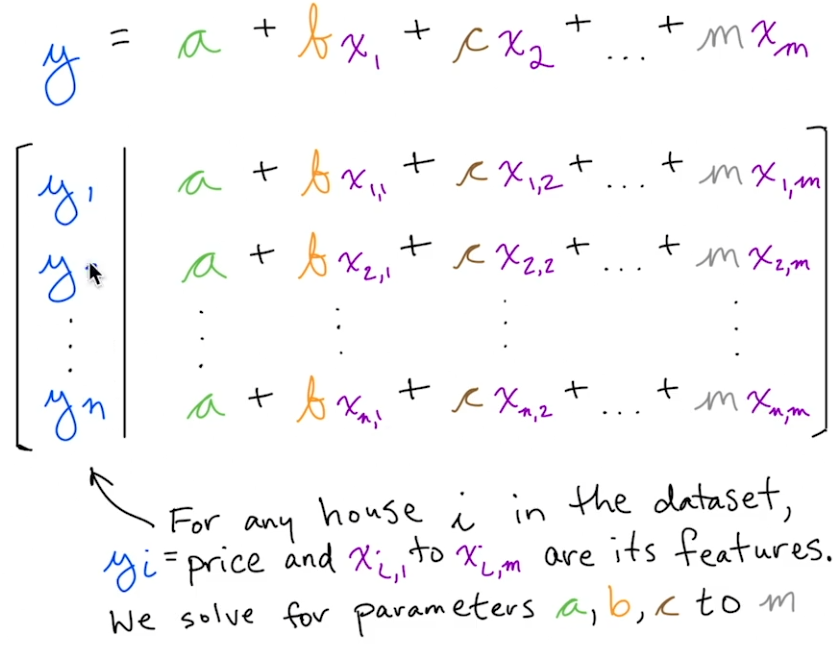

In [3]:
Image("../img/Systems of Equations.png")

<b>Linear Algebra</b> can be applied in the following ways:
<ul>
    <li>Solving for unknowns in ML algos, including deep learning</li>
    <li>Reducing dimensionality (e.g., PCA)</li>
    <li>Ranking results (e.g., with eigenvectors)</li>
    <li>Recommenders (e.g., SVD)</li>
    <li>Natural Language Processing (e.g, SVD, and Matrix Factorization</li>
    <ul>
        <li>Topic Modeling</li>
        <li>Semantic Analysis</li>
    </ul>
</ul>

**Return to slides here.**

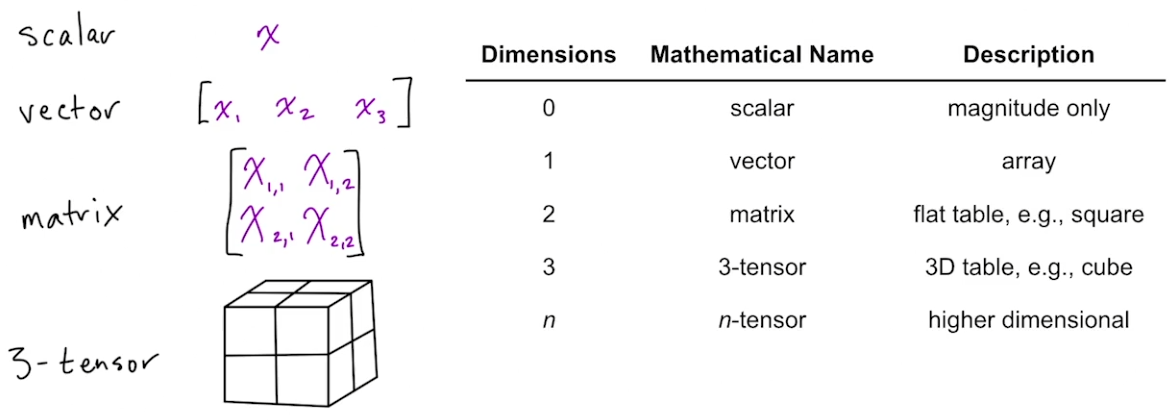

In [3]:
Image("../img/Scalars, Vectors and Matrices.png")

### Scalars (Rank 0 Tensors) in Base Python

<b>Scalars</b> don't have any dimensions. They represent a single value and are denoted in lower-case. They should be typed, like all other tensors is to type its data type (e.g. float32, int32, uint8, etc.).

In [4]:
x = 25
x

25

In [5]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [6]:
y = 3

In [7]:
py_sum = x + y
py_sum

28

In [8]:
type(py_sum)

int

In [9]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [10]:
type(float_sum)

float

### Scalars in PyTorch

* PyTorch and TensorFlow are the two most popular *automatic differentiation* libraries (a focus of the [*Calculus I*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/3-calculus-i.ipynb) and [*Calculus II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb) subjects in the *ML Foundations* series) in Python, itself the most popular programming language in ML
* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example) 
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html)

In [13]:
# import torch

In [14]:
# x_pt = torch.tensor(25) # type specification optional, e.g.: dtype=torch.float16
# x_pt

tensor(25)

In [15]:
# x_pt.shape

torch.Size([])

### Scalars in TensorFlow (version 2.0 or later)

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here. 

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [11]:
import tensorflow as tf

In [12]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [13]:
x_tf.shape # No dimensionality

TensorShape([])

In [14]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [15]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [16]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [17]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

28

In [18]:
type(tf_sum.numpy())

numpy.int16

In [19]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

**Return to slides here.**

### Vectors (Rank 1 Tensors) in NumPy

<b>Vectors</b> are one-dimensional arrays of numbers denoted by the square brackets [] and written in lowercase letters in bold.Individual elements of a vector are stored in the order they appear in the vector and can be accessed using the index notation. They are represented in lower case letters, but not in bold. Vectors represent a point in space, which can be n-dimensional.

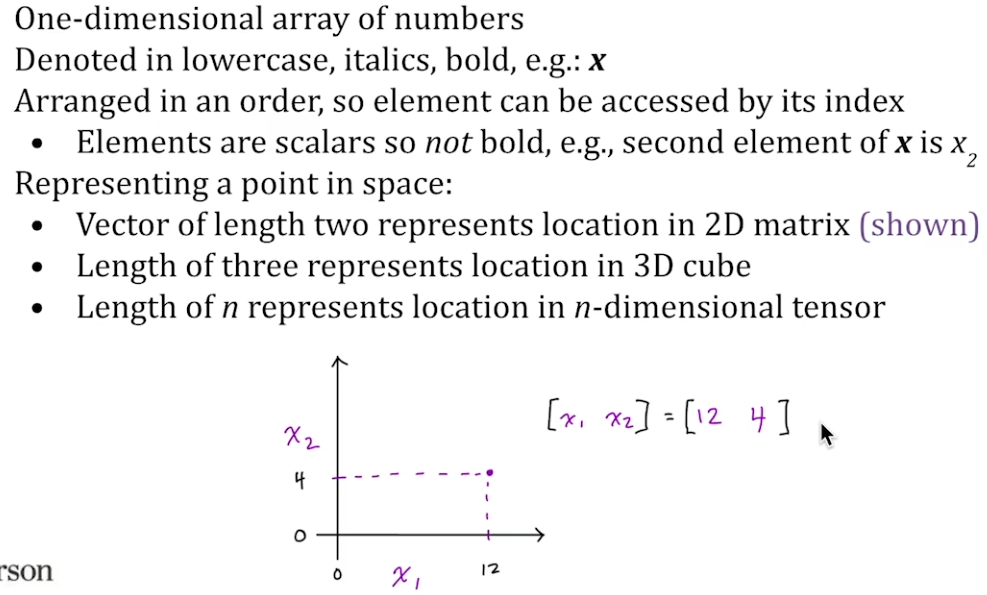

In [20]:
Image("../img/Vectors.png")

<b>Vector Transposition</b> converts a row vector into a column vector and vice versa. The order of the rows is preserved during transposition.

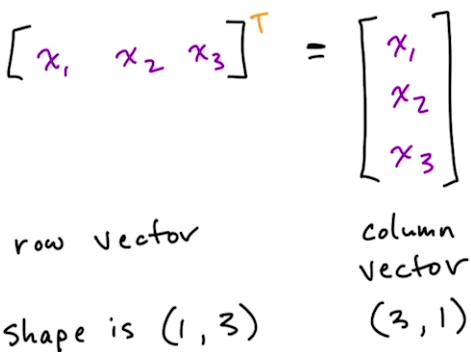

In [21]:
Image("../img/Vector Transposition.png")

In [22]:
x = np.array([25, 2, 5], dtype = np.float16) # type argument is optional, e.g.: dtype=np.float16
x

array([25.,  2.,  5.], dtype=float16)

In [23]:
len(x)

3

In [24]:
x.shape

(3,)

In [25]:
type(x)

numpy.ndarray

In [26]:
x[0] # zero-indexed

25.0

In [27]:
type(x[0])

numpy.float16

### Vector Transposition

In [36]:
# Transposing a regular 1-D array has no effect...
x_t = x.T

print(f"The original vector: {x} has now been transposed to: {x_t}")
print(f"The shape of the original vector: {x.shape} is the same as the shape of the transposed vector: {x_t.shape}")

The original vector: [25.  2.  5.] has now been transposed to: [25.  2.  5.]
The shape of the original vector: (3,) is the same as the shape of the transposed vector: (3,)


In [32]:
# ...but it does we use nested "matrix-style" brackets: 
y = np.array([[25, 2, 5]], dtype = np.float16)
y

array([[25.,  2.,  5.]], dtype=float16)

In [35]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent: 
y_t = y.T

print(f"The original vector: {y} has now been transposed to:\n {y_t}")
print(f"The shape of the original vector: {y.shape} is the same as the shape of the transposed vector: {y_t.shape}")

The original vector: [[25.  2.  5.]] has now been transposed to:
 [[25.]
 [ 2.]
 [ 5.]]
The shape of the original vector: (1, 3) is the same as the shape of the transposed vector: (3, 1)


In [37]:
# Column vector can be transposed back to original row vector: 
y_t.T 

array([[25.,  2.,  5.]], dtype=float16)

In [38]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [39]:
z = np.zeros(3) 
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [40]:
# x_pt = torch.tensor([25, 2, 5])
# x_pt

tensor([25,  2,  5])

In [40]:
x_tf = tf.Variable([[25, 2, 5]])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

In [41]:
x_tf_2 = tf.Variable([[25, 2, 5]])
x_tf_2

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[25,  2,  5]])>

In [43]:
x_tf_2_T = tf.transpose(x_tf_2)
x_tf_2_T.numpy()

array([[25],
       [ 2],
       [ 5]])

**Return to slides here.**

## Norms

In Linear Algebra, a norm is a function that assigns a non-negative real number to each vector in a vector space, capturing its "size" or "magnitude". It is analogous to the concept of distance in metric spaces.

Key properties of a norm are:
1. It must be associative.
2. It must be commutative.
3. It must be additive.
4. It must be idempotent.
5. It must be differentiable.

## Example

Let's say we have a vector space $\mathbb{R}^3$ and we want to find the norm of a vector. We can use the following definition:

$$\|\mathbf{x}\| = \sqrt{\sum_{i=1}^3 x_i^2}$$

Types of norms:
1. Euclidian norm (L2 norm)
2. Manhattan norm (L1 norm)
3. Chebyshev norm 
4. Max norm
5. Min norm

In Machine Learning, norms plays a crucial role.
1. Loss functions: Norms like the Euclidean norm or the Manhattan norm are used to define the penalty for prediction errors, guiding the learning process in algorithms, such as Linear Regression and Support Vector Machines.
2. Regularization: Norms like the Chebyshev norm or the Max norm are used to define the penalty for overfitting, guiding the learning process in algorithms, such as Linear Regression and Support Vector Machines. L1 and L2 norms are commonly used for regularization - Lasso and Ridge.
3. Feature Scaling: Norms can help standardize features to a common scale, improving the convergence and stability of the algorithm.
4. Distance Metric: Norms are used to measure the distance between two vectors.

### $L^2$ Norm

So far we have referred to a vector as a point in space, but they can also be represented as a magnitude and a direction from the origin [0,0] in  2-D space (or in general in n-dimension space). <b>Norms</b> are functions that allow you to compute the magnitude and direction of a vector. it is also known as Vector Magnitude. The L2 norm calculates the distance of the vector coordinate from the origin of the vector space. As such, it is also known as the Euclidean norm as it is calculated as the Euclidean distance from the origin. The result is a positive distance value.

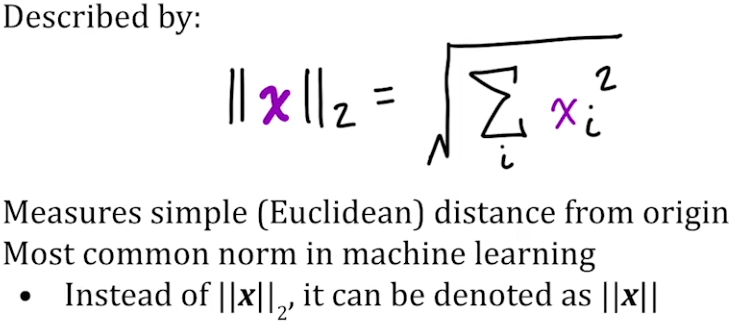

In [44]:
Image("../img/L2-Norm.png")

In [45]:
x

array([25.,  2.,  5.], dtype=float16)

In [46]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [47]:
np.sum([_**2 for _ in x])**(1/2)

25.573423705088842

In [48]:
np.linalg.norm(x)

25.58

A <b>Unit Vector</b> is a special case of a vector that has a magnitude (L2 Norm) of 1.

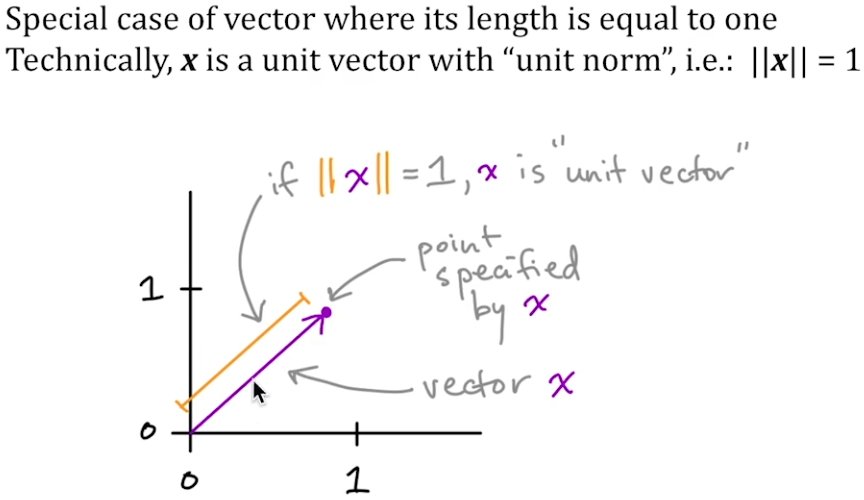

In [49]:
Image("../img/Unit Vector.png")

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

**Return to slides here.**

### $L^1$ Norm

The <b>L1-Norm</b> is a sum of the absolute values of the elements of the matrix. The L1-Norm varies linearly at all locations withing the space. It is used when the distance between zero and non-zero is key for the applicaion.

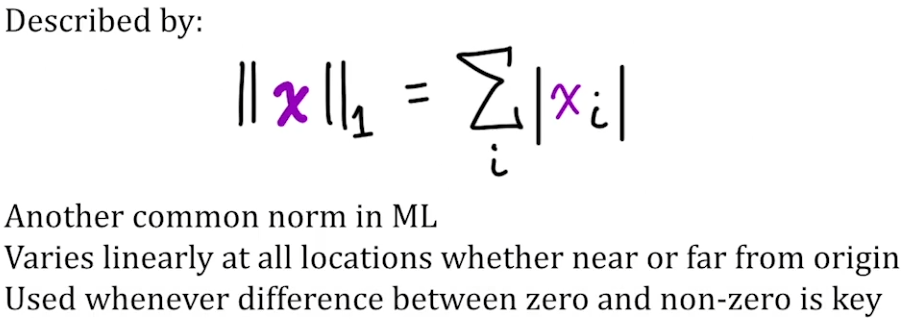

In [50]:
Image("../img/L1-Norm.png")

In [51]:
x

array([25.,  2.,  5.], dtype=float16)

In [52]:
np.abs(25) + np.abs(2) + np.abs(5)

32

In [53]:
np.linalg.norm(x, ord=1)

32.0

**Return to slides here.**

### Squared $L^2$ Norm

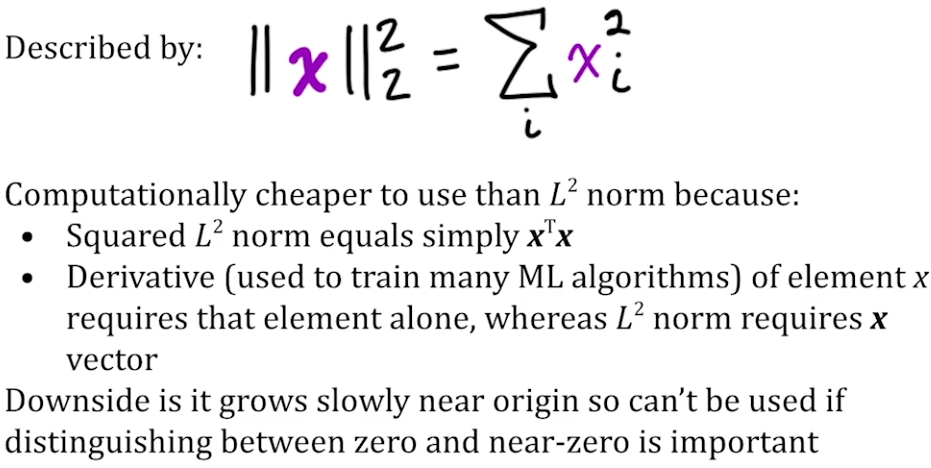

In [54]:
Image("../img/Squared L2-Norm.png")

In [55]:
x

array([25.,  2.,  5.], dtype=float16)

In [56]:
(25**2 + 2**2 + 5**2)

654

In [57]:
# we'll cover tensor multiplication more soon but to prove point quickly: 
np.dot(x, x)

654.0

In [58]:
np.linalg.norm(x)**2

654.240478515625

In [59]:
np.linalg.norm(x, ord=2)**2

654.240478515625

**Return to slides here.**

### Max Norm

A <b>Max-Norm</b> is derived by retaining the maximum value of each of the absolute values of the input vector.

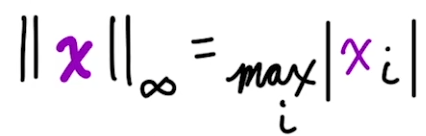

In [60]:
Image("../img/Max-Norm.png")

In [61]:
x

array([25.,  2.,  5.], dtype=float16)

In [62]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

In [64]:
np.max([np.abs(_) for _ in x])

25.0

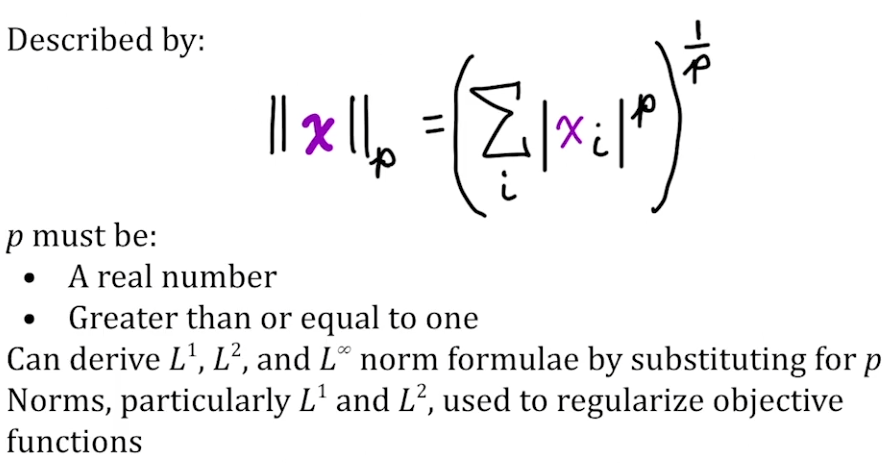

In [65]:
Image("../img/Generalized L-p Norms.png")

**Return to slides here.**

### Orthogonal Vectors

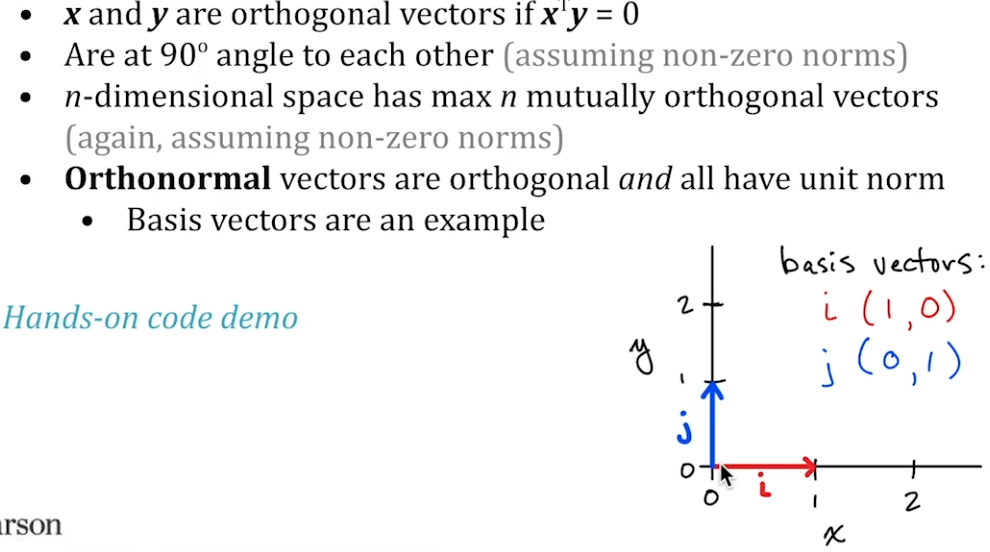

In [66]:
Image("../img/Orthogonal Vectors.png")

In [67]:
i = np.array([1, 0])
i

array([1, 0])

In [68]:
j = np.array([0, 1])
j

array([0, 1])

In [69]:
np.dot(i, j) # detail on the dot operation coming up...

0

**Return to slides here.**

### Matrices (Rank 2 Tensors) in NumPy

In [55]:
# Use array() with nested brackets: 
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [56]:
X.shape

(3, 2)

In [57]:
X.size

6

In [58]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [59]:
# Select middle row of matrix X: 
X[1,:]

array([ 5, 26])

In [60]:
# Another slicing-by-index example: 
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [61]:
# X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
# X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [62]:
# X_pt.shape # more pythonic

torch.Size([3, 2])

In [63]:
# X_pt[1,:]

tensor([ 5, 26])

### Matrices in TensorFlow

In [64]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [65]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [66]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [67]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

**Return to slides here.**

### Higher-Rank Tensors

As an example, rank 4 tensors are common for images, where each dimension corresponds to: 

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for [MNIST digits](http://yann.lecun.com/exdb/mnist/)
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [68]:
# images_pt = torch.zeros([32, 28, 28, 3])

In [69]:
# images_pt

In [70]:
images_tf = tf.zeros([32, 28, 28, 3])

In [71]:
images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

**Return to slides here.**

## Segment 2: Common Tensor Operations

### Tensor Transposition

In [72]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [73]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [74]:
X_pt.T 

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [75]:
tf.transpose(X_tf) # less Pythonic

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

### Basic Arithmetical Properties

Adding or multiplying with scalar applies operation to all elements and tensor shape is retained: 

In [76]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [77]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [78]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [79]:
X_pt*2+2 # Python operators are overloaded; could alternatively use torch.mul() or torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [80]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [81]:
X_tf*2+2 # Operators likewise overloaded; could equally use tf.multiply() tf.add()

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [82]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

If two tensors have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, which we'll cover later, but is rather called the **Hadamard product** or simply the **element-wise product**. 

The mathematical notation is $A \odot X$

In [83]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [84]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [85]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [86]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [87]:
A_pt = X_pt + 2

In [88]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [89]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [90]:
A_tf = X_tf + 2

In [91]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [92]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

### Reduction

Calculating the sum across all elements of a tensor is a common operation. For example: 

* For vector ***x*** of length *n*, we calculate $\sum_{i=1}^{n} x_i$
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [93]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [94]:
X.sum()

68

In [95]:
torch.sum(X_pt)

tensor(68)

In [96]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [97]:
# Can also be done along one specific axis alone, e.g.:
X.sum(axis=0) # summing over all rows

array([33, 35])

In [98]:
X.sum(axis=1) # summing over all columns

array([27, 31, 10])

In [99]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [100]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

Many other operations can be applied with reduction along all or a selection of axes, e.g.:

* maximum
* minimum
* mean
* product

They're fairly straightforward and used less often than summation, so you're welcome to look them up in library docs if you ever need them.

### The Dot Product

If we have two vectors (say, ***x*** and ***y***) with the same length *n*, we can calculate the dot product between them. This is annotated several different ways, including the following: 

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$

Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \cdot y = \sum_{i=1}^{n} x_i y_i$

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [101]:
x

array([25,  2,  5])

In [102]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [103]:
25*0 + 2*1 + 5*2

12

In [104]:
np.dot(x, y)

12

In [105]:
x_pt

tensor([25,  2,  5])

In [106]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [107]:
np.dot(x_pt, y_pt)

12

In [108]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [109]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [110]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [111]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

**Return to slides here.**

### Solving Linear Systems

In the **Substitution** example, the two equations in the system are: 
$$ y = 3x $$
$$ -5x + 2y = 2 $$

The second equation can be rearranged to isolate $y$: 
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [112]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [113]:
y1 = 3 * x

In [114]:
y2 = 1 + (5*x)/2

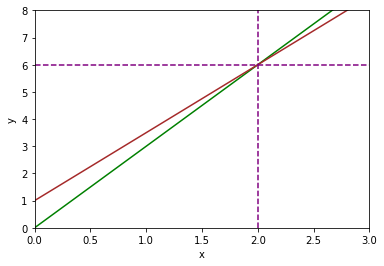

In [115]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

In the **Elimination** example, the two equations in the system are:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Both equations can be rearranged to isolate $y$. Starting with the first equation: 
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Then for the second equation: 
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [116]:
y1 = -5 + (2*x)/3

In [117]:
y2 = (7-2*x)/5

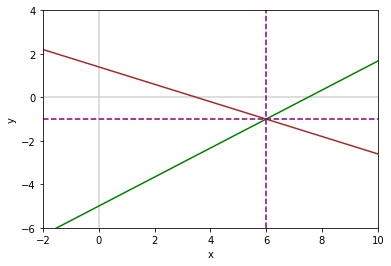

In [118]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes: 
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

## Segment 3: Matrix Properties

### Frobenius Norm

In [119]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [120]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [121]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [122]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [123]:
torch.norm(X_pt)

tensor(5.4772)

In [124]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [125]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

**Return to slides here.**

### Matrix Multiplication (with a Vector)

In [126]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [127]:
b = np.array([1, 2])
b

array([1, 2])

In [128]:
np.dot(A, b) # even though technically dot products are between vectors only

array([11, 17, 23])

In [129]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [130]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [131]:
torch.matmul(A_pt, b_pt) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [132]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [133]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [134]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

**Return to slides here.**

### Matrix Multiplication (with Two Matrices)

In [135]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [136]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [137]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

In [138]:
# np.dot(B, A)

In [139]:
B_pt = torch.from_numpy(B) # much cleaner than TF conversion
B_pt

tensor([[1, 9],
        [2, 0]])

In [140]:
# another neat way to create the same tensor with transposition: 
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [141]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [142]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [143]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

**Return to slides here.**

### Symmetric Matrices

In [144]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [145]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [146]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

**Return to slides here.**

### Identity Matrices

In [147]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [148]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [149]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

**Return to slides here.**

### Answers to Matrix Multiplication Qs

In [150]:
M_q = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [151]:
V_q = torch.tensor([[-1, 1, -2], [0, 1, 2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [152]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

### Matrix Inversion

In [153]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [154]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

As a quick aside, let's prove that $X^{-1}X = I_n$ as per the slides: 

In [155]:
np.dot(Xinv, X)

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

...and now back to solving for the unknowns in $w$: 

In [156]:
y = np.array([4, -7])
y

array([ 4, -7])

In [157]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [158]:
np.dot(X, w)

array([ 4., -7.])

**Geometric Visualization**

Recalling from the slides that the two equations in the system are:
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Both equations can be rearranged to isolate a variable, say $c$. Starting with the first equation: 
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Then for the second equation: 
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [159]:
b = np.linspace(-10, 10, 1000) # start, finish, n points

In [160]:
c1 = 2 - 2*b

In [161]:
c2 = (7-5*b)/3

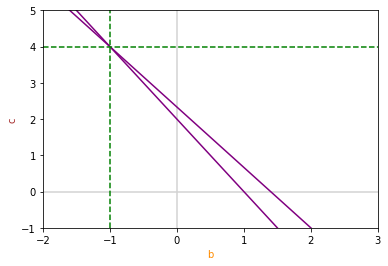

In [162]:
fig, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
plt.axvline(x=-1, color='green', linestyle='--')
_ = plt.axhline(y=4, color='green', linestyle='--')

In PyTorch and TensorFlow:

In [163]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [164]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999999 ,  0.99999994],
       [-2.4999998 , -1.9999999 ]], dtype=float32)>

**Exercises**:

1. As done with NumPy above, use PyTorch to calculate $w$ from $X$ and $y$. Subsequently, confirm that $y = Xw$.
2. Repeat again, now using TensorFlow.

**Return to slides here.**

### Matrix Inversion Where No Solution

In [165]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [166]:
# Uncommenting the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

Feel free to try inverting a non-square matrix; this will throw an error too.

**Return to slides here.**

### Orthogonal Matrices

These are the solutions to Exercises 3 and 4 on **orthogonal matrices** from the slides.

For Exercise 3, to demonstrate the matrix $I_3$ has mutually orthogonal columns, we show that the dot product of any pair of columns is zero: 

In [167]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [168]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [169]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [170]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [171]:
np.dot(column_1, column_2)

0

In [172]:
np.dot(column_1, column_3)

0

In [173]:
np.dot(column_2, column_3)

0

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [174]:
np.linalg.norm(column_1)

1.0

In [175]:
np.linalg.norm(column_2)

1.0

In [176]:
np.linalg.norm(column_3)

1.0

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

For Exercise 4, let's repeat the steps of Exercise 3 with matrix *K* instead of $I_3$. We could use NumPy again, but for fun I'll use PyTorch instead. (You're welcome to try it with TensorFlow if you feel so inclined.)

In [177]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [178]:
Kcol_1 = K[:,0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [179]:
Kcol_2 = K[:,1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [180]:
Kcol_3 = K[:,2]
Kcol_3

tensor([ 0.6667,  0.3333, -0.6667])

In [181]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [182]:
torch.dot(Kcol_1, Kcol_3)

tensor(0.)

In [183]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

We've now determined that the columns of $K$ are orthogonal.

In [184]:
torch.norm(Kcol_1)

tensor(1.)

In [185]:
torch.norm(Kcol_2)

tensor(1.)

In [186]:
torch.norm(Kcol_3)

tensor(1.)

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation from the slides, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [187]:
torch.matmul(K.T, K)

tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix. 